In [1]:
import warnings
warnings.filterwarnings("ignore")
from pydataset import data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_csv('student_grades.csv')
df.head()

,student_id,exam1,exam2,exam3,final_grade
0,1,100.0,90,95,96
1,2,98.0,93,96,95
2,3,85.0,83,87,87
3,4,83.0,80,86,85
4,5,93.0,90,96,97


In [3]:
df.shape

(104, 5)

In [4]:
df.describe()

,student_id,exam1,exam2,final_grade
count,104.000000,103.000000,104.000000,104.000000
mean,52.500000,78.514563,77.307692,81.692308
std,30.166206,14.344408,10.295703,10.918122
min,1.000000,57.000000,65.000000,65.000000
25%,26.750000,70.000000,70.000000,72.000000
50%,52.500000,79.000000,75.000000,81.000000
75%,78.250000,92.000000,89.000000,93.000000
max,104.000000,100.000000,93.000000,97.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
student_id     104 non-null int64
exam1          103 non-null float64
exam2          104 non-null int64
exam3          104 non-null object
final_grade    104 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 4.1+ KB


In [6]:
print(df.isnull().sum())
print(df.columns[df.isnull().any()])

student_id     0
exam1          1
exam2          0
exam3          0
final_grade    0
dtype: int64
Index(['exam1'], dtype='object')


In [7]:
#notice the blank
counts=df.exam3.value_counts(sort=True,ascending=True)
print(counts)

         1
70       8
79       8
86       8
87       8
94       8
95       8
85       8
78      15
75      16
96      16
Name: exam3, dtype: int64


In [8]:
#get rid of it by replacing with a null value
df.replace(r'^\s*$',np.nan,regex=True,inplace=True)

In [9]:
#notice the blank was now replaced by a missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
student_id     104 non-null int64
exam1          103 non-null float64
exam2          104 non-null int64
exam3          103 non-null object
final_grade    104 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 4.1+ KB


In [10]:
df=df.dropna().astype('int')

In [11]:
df.describe()

,student_id,exam1,exam2,exam3,final_grade
count,102.000000,102.000000,102.000000,102.000000,102.000000
mean,53.362745,78.598039,77.500000,84.303922,81.794118
std,29.814871,14.390082,10.297313,8.730043,11.000754
min,1.000000,57.000000,65.000000,70.000000,65.000000
25%,28.250000,70.000000,70.000000,78.000000,72.000000
50%,53.500000,79.000000,75.000000,85.000000,81.000000
75%,78.750000,92.000000,89.000000,94.000000,93.000000
max,104.000000,100.000000,93.000000,96.000000,97.000000


In [12]:
df_melted=pd.melt(df,id_vars=['student_id'],value_vars=['exam1','exam2','exam3','final_grade'],var_name='grade_type',value_name='score')

In [13]:
df_melted.head()

,student_id,grade_type,score
0,1,exam1,100
1,2,exam1,98
2,3,exam1,85
3,4,exam1,83
4,5,exam1,93


In [14]:
#the 2 rows that had null values were dropped
df_melted['grade_type'].value_counts()

exam2          102
exam1          102
exam3          102
final_grade    102
Name: grade_type, dtype: int64

In [15]:
df_melted['score'].value_counts(bins=5,sort=False)

(56.956, 65.6]     55
(65.6, 74.2]       77
(74.2, 82.8]       84
(82.8, 91.4]       88
(91.4, 100.0]     104
Name: score, dtype: int64

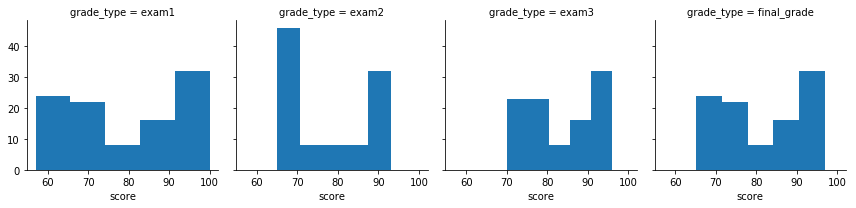

In [17]:
grid=sns.FacetGrid(df_melted,col='grade_type',margin_titles=True)
grid.map(plt.hist,'score',bins=5)
plt.show()